In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
import os
import numpy as np
import sigpy as sp
import sigpy.plot as pl
from cmcrameri import cm

from dipy.segment.mask import median_otsu
from dipy.io.image import load_nifti, save_nifti
from dipy.io.gradients import read_bvals_bvecs
import numpy as np
import nrrd
import scikit_posthocs as sp

import sys
sys.path.append("/home/ahannum/Documents/Phase/cDTI_python")
from mystic_mrpy.Data_Import.Diffusion   import *
from mystic_mrpy.Data_Sorting.Diffusion  import *
from mystic_mrpy.Diffusion.DWI  import *
from mystic_mrpy.Diffusion.Gibbs         import *
from mystic_mrpy.Diffusion.Registration  import *
from mystic_mrpy.Diffusion.Rejection     import *
from mystic_mrpy.Diffusion.Respiratory   import *
from mystic_mrpy.Diffusion.Averaging     import *
from mystic_mrpy.Diffusion.Denoising     import *
from mystic_mrpy.Diffusion.Interpolation import *
from mystic_mrpy.Diffusion.Segmentation_Matrix_DTI import *
from mystic_mrpy.Diffusion.DTI import *
from mystic_mrpy.Diffusion.cDTI import *

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat

# Helper Functions

In [2]:
def diffusion_bootstrap(iterations, repetitions):
    ########## Import modules #####################################################################################################################
    import numpy as np                                                                                                 # Import numpy module
    import random  
    import itertools                                                                                                  # Import random module
    import random

    ########## Store Combinations Information#######3 ############################################################################################
    combos = (list(itertools.combinations(np.arange(40),r=repetitions)))
    selection = random.sample(list(np.arange(len(combos))),iterations)
    select_idx = [combos[i] for i in selection]
    
    return select_idx


def task(iter):
    bvals_sort = np.array([   0., 1000., 1000., 1000.])
    bvecs_sort = np.array([[ 0.,  0. ,  0. ], [ 0.99999, -0.00506, -0.001  ], [-0.00506, -0.99999, -0.001  ], [ 0. ,  0.  , -1. ]])
    registered_matrix = register(iter, bvals_sort, bvecs_sort,registration_algorithm = 'Rigid', temporary_denoising = 'OFF', operation_type = 'Complex')
    return np.angle(registered_matrix[0])


def m0_register(iter):
    volunteers=[1,2,3,4,5,7,8,9,10,11]
    inpath = '/home/ahannum/Documents/Phase/Data/V00' + str(volunteers[iter])

    data,affine, voxsize = load_nifti(os.path.join(inpath, 'M0_registered.nii'), return_voxsize=True)
    bvals = np.loadtxt(os.path.join(inpath,'M0_registered.bvals')) 
    bvecs = np.loadtxt(os.path.join(inpath,'M0_registered.bvecs'))

    data1,bvals_sort,bvecs_sort = stacked2sorted(data,bvals,bvecs.T)
    registered_matrix,registered_bvals,registered_bvecs = register(data1, bvals_sort, bvecs_sort,registration_algorithm = 'Rigid', temporary_denoising = 'OFF', operation_type = 'Complex')
    NifTi_string         = os.path.join(inpath, 'M0_registered_all' + ".nii")
    img                  = nib.Nifti1Image(registered_matrix, affine)
    img_header           = img.header
    img_header['pixdim'] = [1, voxsize[0], voxsize[1], voxsize[2], 1, 1, 1, 1]
    nib.save(img, NifTi_string)
    return iter


def m1_register(iter):
    volunteers=[1,2,3,4,5,7,8,9,10,11]
    inpath = '/home/ahannum/Documents/Phase/Data/V00' + str(volunteers[iter])

    data,affine, voxsize = load_nifti(os.path.join(inpath, 'M1_registered.nii'), return_voxsize=True)
    bvals = np.loadtxt(os.path.join(inpath,'M1_registered.bvals')) 
    bvecs = np.loadtxt(os.path.join(inpath,'M1_registered.bvecs'))

    data1,bvals_sort,bvecs_sort = stacked2sorted(data,bvals,bvecs.T)
    registered_matrix,registered_bvals,registered_bvecs = register(data1, bvals_sort, bvecs_sort,registration_algorithm = 'Rigid', temporary_denoising = 'OFF', operation_type = 'Complex')
    NifTi_string         = os.path.join(inpath, 'M1_registered_all' + ".nii")
    img                  = nib.Nifti1Image(registered_matrix, affine)
    img_header           = img.header
    img_header['pixdim'] = [1, voxsize[0], voxsize[1], voxsize[2], 1, 1, 1, 1]
    nib.save(img, NifTi_string)
    return iter

def m2_register(iter):
    volunteers=[1,2,3,4,5,7,8,9,10,11]
    inpath = '/home/ahannum/Documents/Phase/Data/V00' + str(volunteers[iter])

    data,affine, voxsize = load_nifti(os.path.join(inpath, 'M2_registered.nii'), return_voxsize=True)
    bvals = np.loadtxt(os.path.join(inpath,'M2_registered.bvals')) 
    bvecs = np.loadtxt(os.path.join(inpath,'M2_registered.bvecs'))

    data1,bvals_sort,bvecs_sort = stacked2sorted(data,bvals,bvecs.T)
    registered_matrix,registered_bvals,registered_bvecs = register(data1, bvals_sort, bvecs_sort,registration_algorithm = 'Rigid', temporary_denoising = 'OFF', operation_type = 'Complex')
    NifTi_string         = os.path.join(inpath, 'M2_registered_all' + ".nii")
    img                  = nib.Nifti1Image(registered_matrix, affine)
    img_header           = img.header
    img_header['pixdim'] = [1, voxsize[0], voxsize[1], voxsize[2], 1, 1, 1, 1]
    nib.save(img, NifTi_string)
    return iter


# Registering all data together before boostrapping for each volunteer

In [3]:
import concurrent.futures
import logging
import threading
import time
import nibabel as nib

# Register all repetitions and directions together for either M0, M1, M2 all volunteers 
with concurrent.futures.ThreadPoolExecutor(max_workers=32) as executor:
    futures = [executor.submit(m1_register,num) for num in range(10)]
    for future in concurrent.futures.as_completed(futures):
        print(future.result())
        

Temporary denoising is turned off.
Temporary denoising is turned off.
Temporary denoising is turned off.
Temporary denoising is turned off.
Temporary denoising is turned off.
Temporary denoising is turned off.
Temporary denoising is turned off.
Registering diffusion directions to first diffusion direction (b = 0) for each average.
Registering diffusion directions to first diffusion direction (b = 0) for each average.
Temporary denoising is turned off.
Registering diffusion directions to first diffusion direction (b = 0) for each average.
Temporary denoising is turned off.
Registering diffusion directions to first diffusion direction (b = 0) for each average.
Temporary denoising is turned off.
Registering diffusion directions to first diffusion direction (b = 0) for each average.
Registering diffusion directions to first diffusion direction (b = 0) for each average.
Registering diffusion directions to first diffusion direction (b = 0) for each average.
Registering diffusion directions t

In [4]:
import concurrent.futures
import logging
import threading
import time
import nibabel as nib

# Register all repetitions and directions together for either M0, M1, M2 all volunteers 
with concurrent.futures.ThreadPoolExecutor(max_workers=32) as executor:
    futures = [executor.submit(m2_register,num) for num in range(10)]
    for future in concurrent.futures.as_completed(futures):
        print(future.result())

Temporary denoising is turned off.
Temporary denoising is turned off.
Temporary denoising is turned off.
Registering diffusion directions to first diffusion direction (b = 0) for each average.
Temporary denoising is turned off.
Temporary denoising is turned off.
Registering diffusion directions to first diffusion direction (b = 0) for each average.
Temporary denoising is turned off.
Registering diffusion directions to first diffusion direction (b = 0) for each average.
Temporary denoising is turned off.
Registering diffusion directions to first diffusion direction (b = 0) for each average.
Registering diffusion directions to first diffusion direction (b = 0) for each average.
Registering diffusion directions to first diffusion direction (b = 0) for each average.
Registering diffusion directions to first diffusion direction (b = 0) for each average.
Temporary denoising is turned off.
Temporary denoising is turned off.
Temporary denoising is turned off.
Registering diffusion directions t

# REgister Volunteer Slices All Together

In [4]:
output=[]
iterations = 1000
repetitions = 5
idx = diffusion_bootstrap(iterations, repetitions)
len(idx)

1000

In [12]:
iterations = 10000
repetitions = 5
idx = diffusion_bootstrap(iterations, repetitions)

num = 0

print('starting',num)
volunteers=[1,2,3,4,5,7,8,9,10,11]

num = 0
inpath = '/home/ahannum/Documents/Phase/Data/V00' + str(volunteers[num])
data,affine, voxsize = load_nifti(os.path.join(inpath, 'M0_registered_all.nii'), return_voxsize=True)
M0_adj = np.exp(1j*np.angle(data[:,:,:,:,idx]))

savename = os.path.join(inpath, 'M0_diff_boostrap.npy')
M0_diff = np.angle(M0_adj / np.nanmean(M0_adj,axis = -1)[:,:,:,:,:,np.newaxis])
mdic = {"M0_diff_boostrap",M0_diff}
savemat(savename,mdic)

starting 0


# Boostrap and Save Images, Phase Difference, Phase Standard Deviation

In [3]:
#Revised Background phase removal 

import concurrent.futures
import logging
import threading
import time
import nibabel as nib
from scipy.io import savemat

def metrics(num):
    iterations = 1000
    repetitions = 5
    idx = diffusion_bootstrap(iterations, repetitions)

    print('starting',num)
    volunteers=[1,2,3,4,5,7,8,9,10,11]
    inpath = '/home/ahannum/Documents/Phase/Data/V00' + str(volunteers[num])
    data = np.load(os.path.join(inpath, 'M1_phs_boostrap.npy'))
    M0_adj = np.exp(1j*data)/np.nanmean(np.exp(1j*data[:,:,:,0,:,:]),axis = -1)[:,:,:,np.newaxis,:,np.newaxis]
    
    #savename = os.path.join(inpath, 'M0_diff_boostrap.npy')
    M0_diff = np.angle(M0_adj / np.nanmean(M0_adj,axis = -1)[:,:,:,:,:,np.newaxis])
    #np.save(savename,M0_diff)
    
    #print('Finished Difference',num)
    del M0_adj,data
    
    savename = os.path.join(inpath, 'M1_std_boostrap_bg.npy')
    M0_std = np.sqrt(np.sum(M0_diff**2,axis = -1)/5)
    np.save(savename,M0_std)

    del M0_std, M0_diff
    print('Finished std',num)
    return num



with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    futures = [executor.submit(metrics,ii) for ii in range(10)]

    for future in concurrent.futures.as_completed(futures):
        print(future.result())
        #output.append(future.result())
        


starting 0
starting 2
starting 1
starting 4
starting 3
Finished std 4
4
starting 5
Finished std 0
0
starting 6
Finished std 3
3
starting 7
Finished std 1
1
starting 8
Finished std 2
2
starting 9
Finished std 6
6
Finished std 5
5
Finished std 7
7
Finished std 9
9
Finished std 8
8


# Boostrap Metrics

# Debug 

In [28]:
import numpy as np
inpath = '/home/ahannum/Documents/Phase/Data/V005'
data = np.load(os.path.join(inpath, 'M1_phs_boostrap.npy'))

In [30]:
b0 = np.exp(1j*)
M0_adj = np.exp(1j*np.angle(test))/np.nanmean(np.exp(1j*data[:,:,:,0,:,:]),axis = -1)[:,:,:,np.newaxis,:,np.newaxis]


(128, 128, 4, 5)

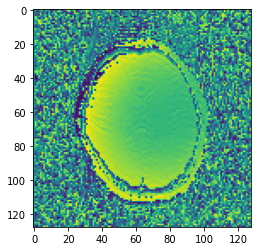

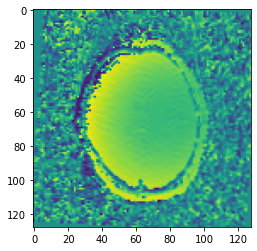

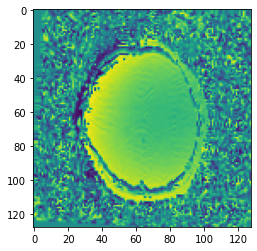

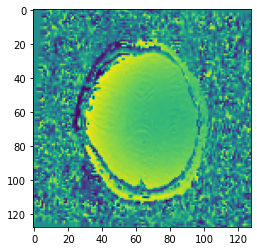

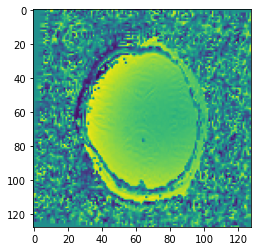

In [24]:
for ii in range(5):
    plt.imshow(data[:,:,3,0,0,ii])
    plt.show()

In [11]:
M0_diff = np.angle(M0_adj / np.nanmean(M0_adj,axis = -1)[:,:,:,:,:,np.newaxis])
